## Instructions

1) Label your homework solutions with your last name, such as HW3_solutions.
####  If you do not want to share your name with your peer grader, you do not have to write your name in the assignment solutions  from now on
2) Deliverables: You need to submit 3 files.
* ipython notebook file with all of your codes
* HTML file of your ipython notebook file.
* Your HW solution in a pdf file. Please write this part of the solution in a research paper format: Give a proper title, solve each problem, and write findings so that you tell a story with the data set you have and the problems you need to solve. Attach plots, figures, and code snippets wherever necessary. 

3) To submit your homework solutions, go to our course in Canvas --> Assignments --> HW 4 --> Submit Assignment --> Click "Choose File" --> choose the HTML file you saved --> Click another file--> choose ipynb file--> Repeat this process to add a pdf file--submit. Once you submit, download and check to ensure that you have submitted the correct files.

4) \textbf{Your submission will be compared against other students' solutions and online databases to check for plagiarism.}

5) You can use this ipynb file to start your solution.

6) Here are the links for the data used in this HW.
* textdata is a modified form of the data from https://www.kaggle.com/competitions/commonlitreadabilityprize/overview
* social network ids data set is just a data with two column of ids and does not need any more information about the ids in this HW.
7) This HW will be peer graded + Instructor graded.

<font color='red'> WARNING: Disclosure of this assignment and assignment answers to anybody or any website is a contributory infringement of academic dishonesty at ISU. Do not share or post course materials without the express written consent of the copyright holder and instructor. The class will follow Iowa State University’s policy on academic dishonesty. Anyone suspected of academic dishonesty will be reported to the Dean of Students Office.</font>

#### Each problem is worth 25 points. Total $\bf 25\times 4 = 100$.

In [1]:
!pip install yfinance
!pip install yahoofinancials
!pip install beautifulsoup4
!pip install yahoo-fin -U
!pip install scikit-surprise
!pip install scrapy
!pip install newspaper3k
!pip install GoogleNews

### Problem 1. 
Upload the sn_ids.csv and do the following. 
* Use the Pagerank algorithm to find the rank of all the ids. Then filter the dictionary in decreasing order. Round the PageRank values to 3 decimal places and create a data frame with two columns: "ids" and "PageRank" values
* Find a list of ids using the data frame of ids and PageRank in part a with the top 5 PageRank values and use the list to filter the original sn_ids.csv data set in both columns 'id_1' and 'id_2'. Finally, plot the network graph of the filtered data using following details: figsize(50, 50), a different color for "id_1" and "id_2".
* Repeat part a using the HITS algorithm.
* Repeat part b using the data from part c.

In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, text
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import seaborn as sns
from sklearn.linear_model import LinearRegression
from dmba import plotDecisionTree
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
import networkx as nx 
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)

sn_ids = pd.read_csv('sn_ids.csv')
print(sn_ids.head())

print('\n', sn_ids.shape)

   id_1   id_2
0     0  23977
1     1  34526
2     1   2370
3     1  14683
4     1  29982

 (289003, 2)


In [3]:
def draw_graph(G, show_names=False, node_size=1, font_size=10, edge_width=0.5): 

    import numpy as np
    import networkx as nx
    
    from IPython.display import SVG 
    from sknetwork.visualization import svg_graph 
    from sknetwork.data import Bunch 
    from sknetwork.ranking import PageRank 

    adjacency = nx.to_scipy_sparse_matrix(G, nodelist=None, dtype=None, weight='weight', format='csr') 

    names = np.array(list(G.nodes())) 

    graph = Bunch() 
    graph.adjacency = adjacency 
    graph.names = np.array(names) 

    pagerank = PageRank() 

    scores = pagerank.fit_transform(adjacency) 

    if show_names: 
        
        image = svg_graph(graph.adjacency, font_size=font_size, node_size=node_size, names=graph.names, width=700, height=500, scores=scores, edge_width=edge_width) 

    else: 

        image = svg_graph(graph.adjacency, node_size=node_size, width=700, height=500, scores = scores, edge_width=edge_width) 

    return SVG(image) 

In [4]:
G = nx.from_pandas_edgelist(sn_ids, 'id_1', 'id_2')
##plt.figure(figsize=(30,30)) 
#nx.draw_networkx(G)
#plt.show()

In [5]:
pagerank = nx.pagerank(G) 
pagerank_df = pd.DataFrame(pagerank, index=[0]).T 
pagerank_df.columns = ['pagerank'] 
pagerank_df.sort_values('pagerank', inplace=True, ascending=False)

pagerank_df['pagerank'] = round(pagerank_df['pagerank'], 3)

pagerank_df.head(10) 

,pagerank
31890,0.017
27803,0.011
35773,0.005
19222,0.005
13638,0.004
36652,0.004
18163,0.003
9051,0.003
10001,0.003
35008,0.002


In [6]:
page_df = pd.DataFrame({'ids': pagerank_df.index, 'pagerank': pagerank_df['pagerank']})
page_df.reset_index
page_df.head()

,ids,pagerank
31890,31890,0.017
27803,27803,0.011
35773,35773,0.005
19222,19222,0.005
13638,13638,0.004


In [7]:
#Find a list of ids using the data frame of ids and PageRank in part a with the top 5 PageRank values and use the list to filter the original
#sn_ids.csv data set in both columns 'id_1' and 'id_2'. Finally, plot the network graph of the filtered data using following details: figsize(50, 50), 
#a different color for "id_1" and "id_2".

#top5id = page_df.ids.value_counts().nlargest(5)

#top5 = page_df.pagerank.value_counts().nlargest(5).to_frame().reset_index()
top5 = page_df.pagerank.value_counts().nlargest(5).tolist()
top5

[37610, 71, 10, 3, 2]

In [8]:
#id1counts = sn_ids.id_1.value_counts().to_frame().reset_index()
#id1counts.columns = ["id_1", "connections"]
#print(id1counts)

#id1mostfrequent = id1counts['connections']
#filter by top5
#frequentid1 = list(top5)
#print(id1mostfrequent.shape)

print(top5)

filteredby_id1 = sn_ids[sn_ids["id_1"].isin(top5)]
print(filteredby_id1.shape)



[37610, 71, 10, 3, 2]
(89, 2)


In [9]:
#id2counts = sn_ids.id_2.value_counts().to_frame().reset_index()
#id2counts.columns = ["id_2", "connections"]
#print(id2counts)

#id2mostfrequent = id2counts['connections']
#filter by top5
#frequentid2 = list(top5)
#print(id2mostfrequent.shape)

print(top5)
filteredby_id2 = sn_ids[sn_ids["id_2"].isin(top5)]
print(filteredby_id2.head)
print(filteredby_id2.shape)


[37610, 71, 10, 3, 2]
<bound method NDFrame.head of          id_1   id_2
27275    9395  37610
52714    3502  37610
54031    3625  37610
57542    3922  37610
57648    3932  37610
60903    4174  37610
86039   25576  37610
86405    6301  37610
93462    6825  37610
115206   8580  37610
147564  11279  37610
148486  11401  37610
157718  20363  37610
188577  27745  37610
188960  15702  37610
198231  33863  37610>
(16, 2)


In [10]:
filtered_data = pd.concat([filteredby_id1, filteredby_id2], axis = 0)
filtered_data.head()

,id_1,id_2
11,3,4950
12,3,18029
13,3,3358
14,3,34935
15,3,5916


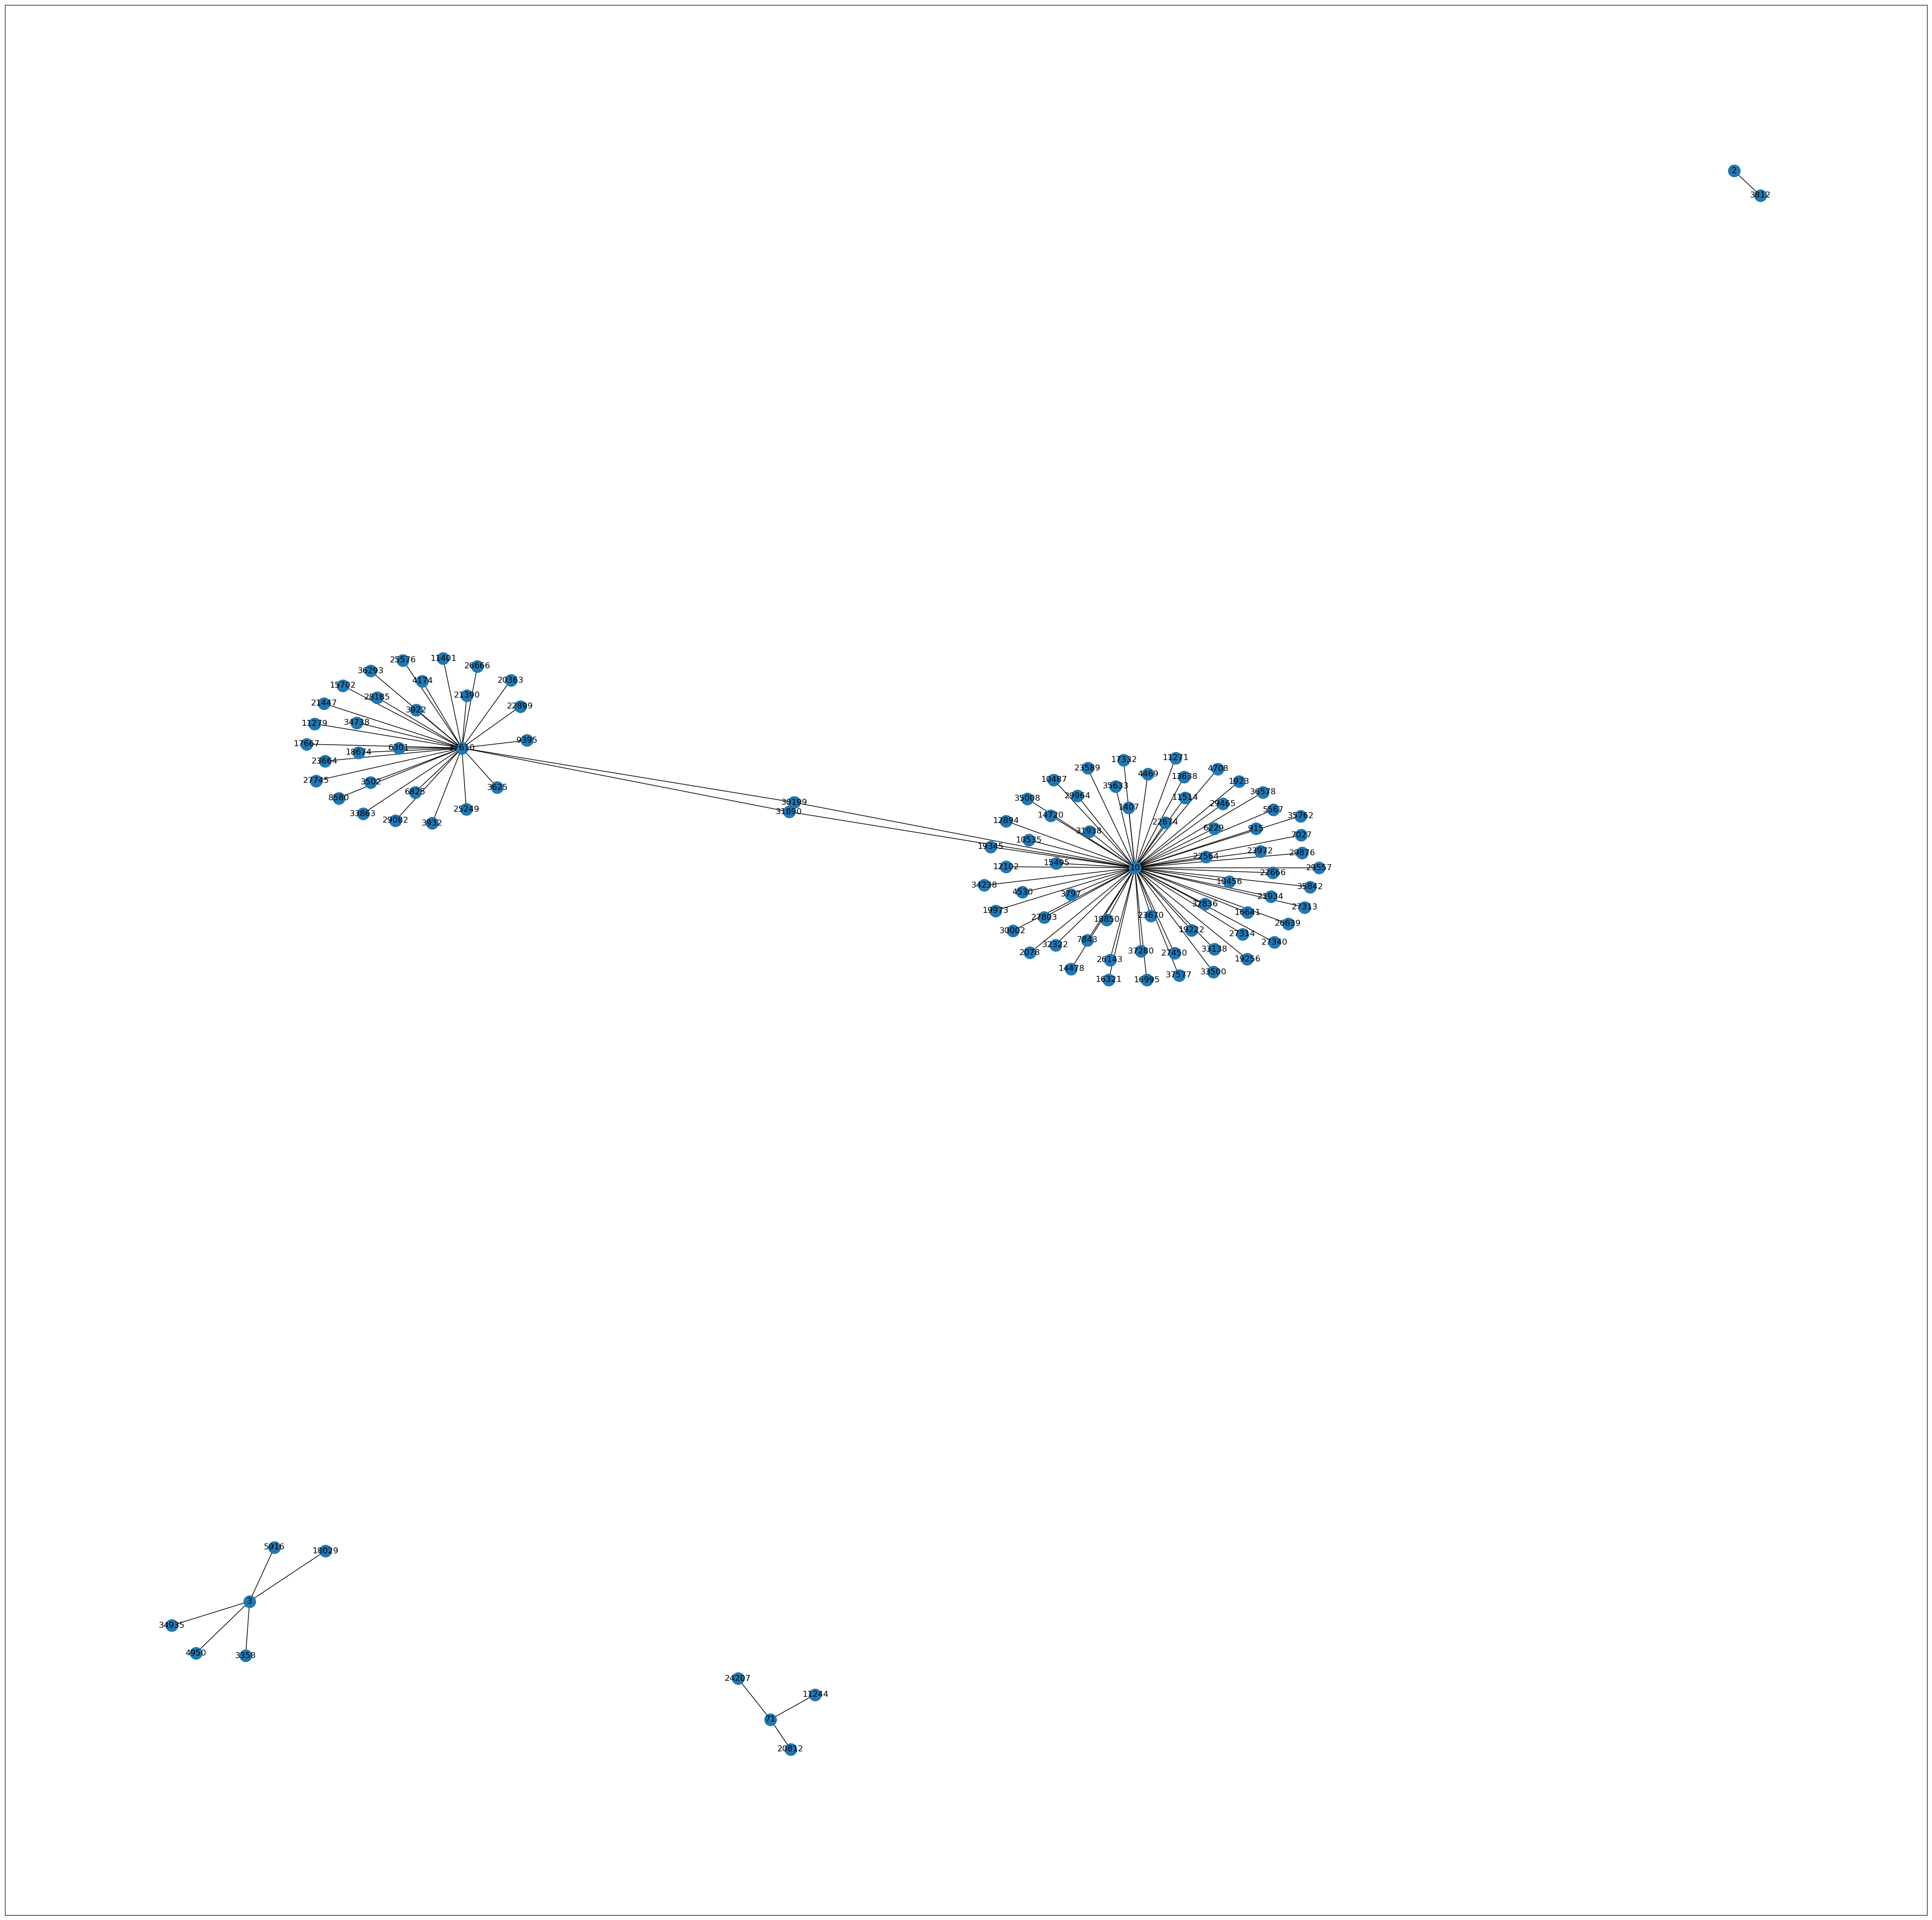

In [11]:
#looking at both of them id 31890 has the highest number of connections.

G = nx.from_pandas_edgelist(filtered_data, 'id_1', 'id_2')
fig, ax = plt.subplots(figsize=(50,50))
nx.draw_networkx(G)
plt.show()


C:\Users\erwin\anaconda3\lib\site-packages\networkx\algorithms\link_analysis\hits_alg.py:78: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G, nodelist=list(G), dtype=float)


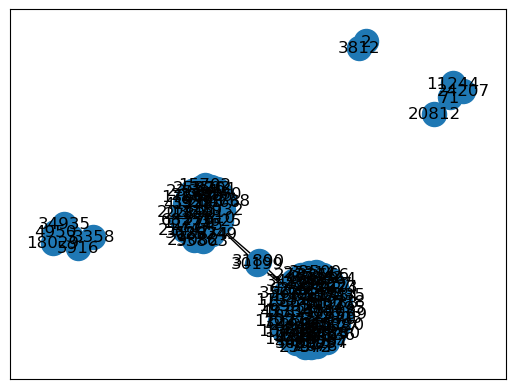

In [12]:
#now instead of the page_rank algorithm, do the same with the HITS algorithm

H = G.to_directed()
hits, authorities = nx.hits(H, max_iter = 50, normalized = True)
hits

#nx.spring_layout is a popular algorithm to use when working with HITS. it uses a force-directed model
pos = nx.spring_layout(G)
nx.draw_networkx(G)
plt.show()
#hit_df = pd.DataFrame.from_dict(hits)

### Problem 2. 
Do the following using the Yahoo Finance package.
* Download the 20 ticker symbols ( listed below) data and create a data frame with 3 columns: Ticker Symbol, Top 20 institutional holders of the 20 tickers,  and how much the holders hold in dollar amount.
* Create a network graph with the holder as a source and the ticker symbol as a target. Label the vertices with their respective labels.
* Add different colors for the source and the target, and change the size of the edge using the normalized holding amount. And change the size of the ticker symbols by their degrees (scale if required). See : http://andrewtrick.com/stormlight_network.html
* Change at least something to the graph in part c to make the graph better ( in your own eyes)  

In [13]:
top20_tickers = ["AAPL", "AMZN", "MSFT", "GOOG", "GOOGL", "META", "TSLA", "NVDA", "JPM", "JNJ", "V", "PG",
                 "UNH", "HD", "MA", "BAC", "DIS", "PYPL", "NFLX", "ADBE"]

In [14]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.feature_selection import SelectKBest, f_regression
import numpy as np
from sklearn.model_selection import cross_val_score
import yfinance as yf
from yahoofinancials import YahooFinancials



def yahoo(STRING):
    
    STRING_hold = STRING.institutional_holders
    #print(STRING_hold.head())
    symbol_value = STRING.info['symbol']
    #print(symbol_value)

    h = STRING_hold.Holder.values.tolist()
    val = STRING_hold.Value.values.tolist()
    sym = [symbol_value]*len(val)
    
    temp_df = pd.DataFrame(columns = ['SYMBOL', 'HOLDER', 'CASH'])
    temp_df['SYMBOL'] = sym
    temp_df['HOLDER'] = h
    temp_df['CASH'] = val
    
    #df = pd.concat([df, temp_df])

    return(temp_df)



In [15]:
stock_df = pd.DataFrame(columns = ['SYMBOL', 'HOLDER', 'CASH'])

for i in top20_tickers:
    STRING = yf.Ticker(i)
    df = yahoo(STRING)
    stock_df =pd.concat([stock_df, df])

stock_df

,SYMBOL,HOLDER,CASH
0,AAPL,"Vanguard Group, Inc. (The)",209326301081
1,AAPL,Blackrock Inc.,168543149157
2,AAPL,"Berkshire Hathaway, Inc",146587495100
3,AAPL,State Street Corporation,96103765419
4,AAPL,"FMR, LLC",52593554661
...,...,...,...
5,ADBE,"Geode Capital Management, LLC",3451690543
6,ADBE,Bank Of New York Mellon Corporation,2645951491
7,ADBE,Primecap Management Company,2302407783
8,ADBE,"Polen Capital Management, LLC",2276464605


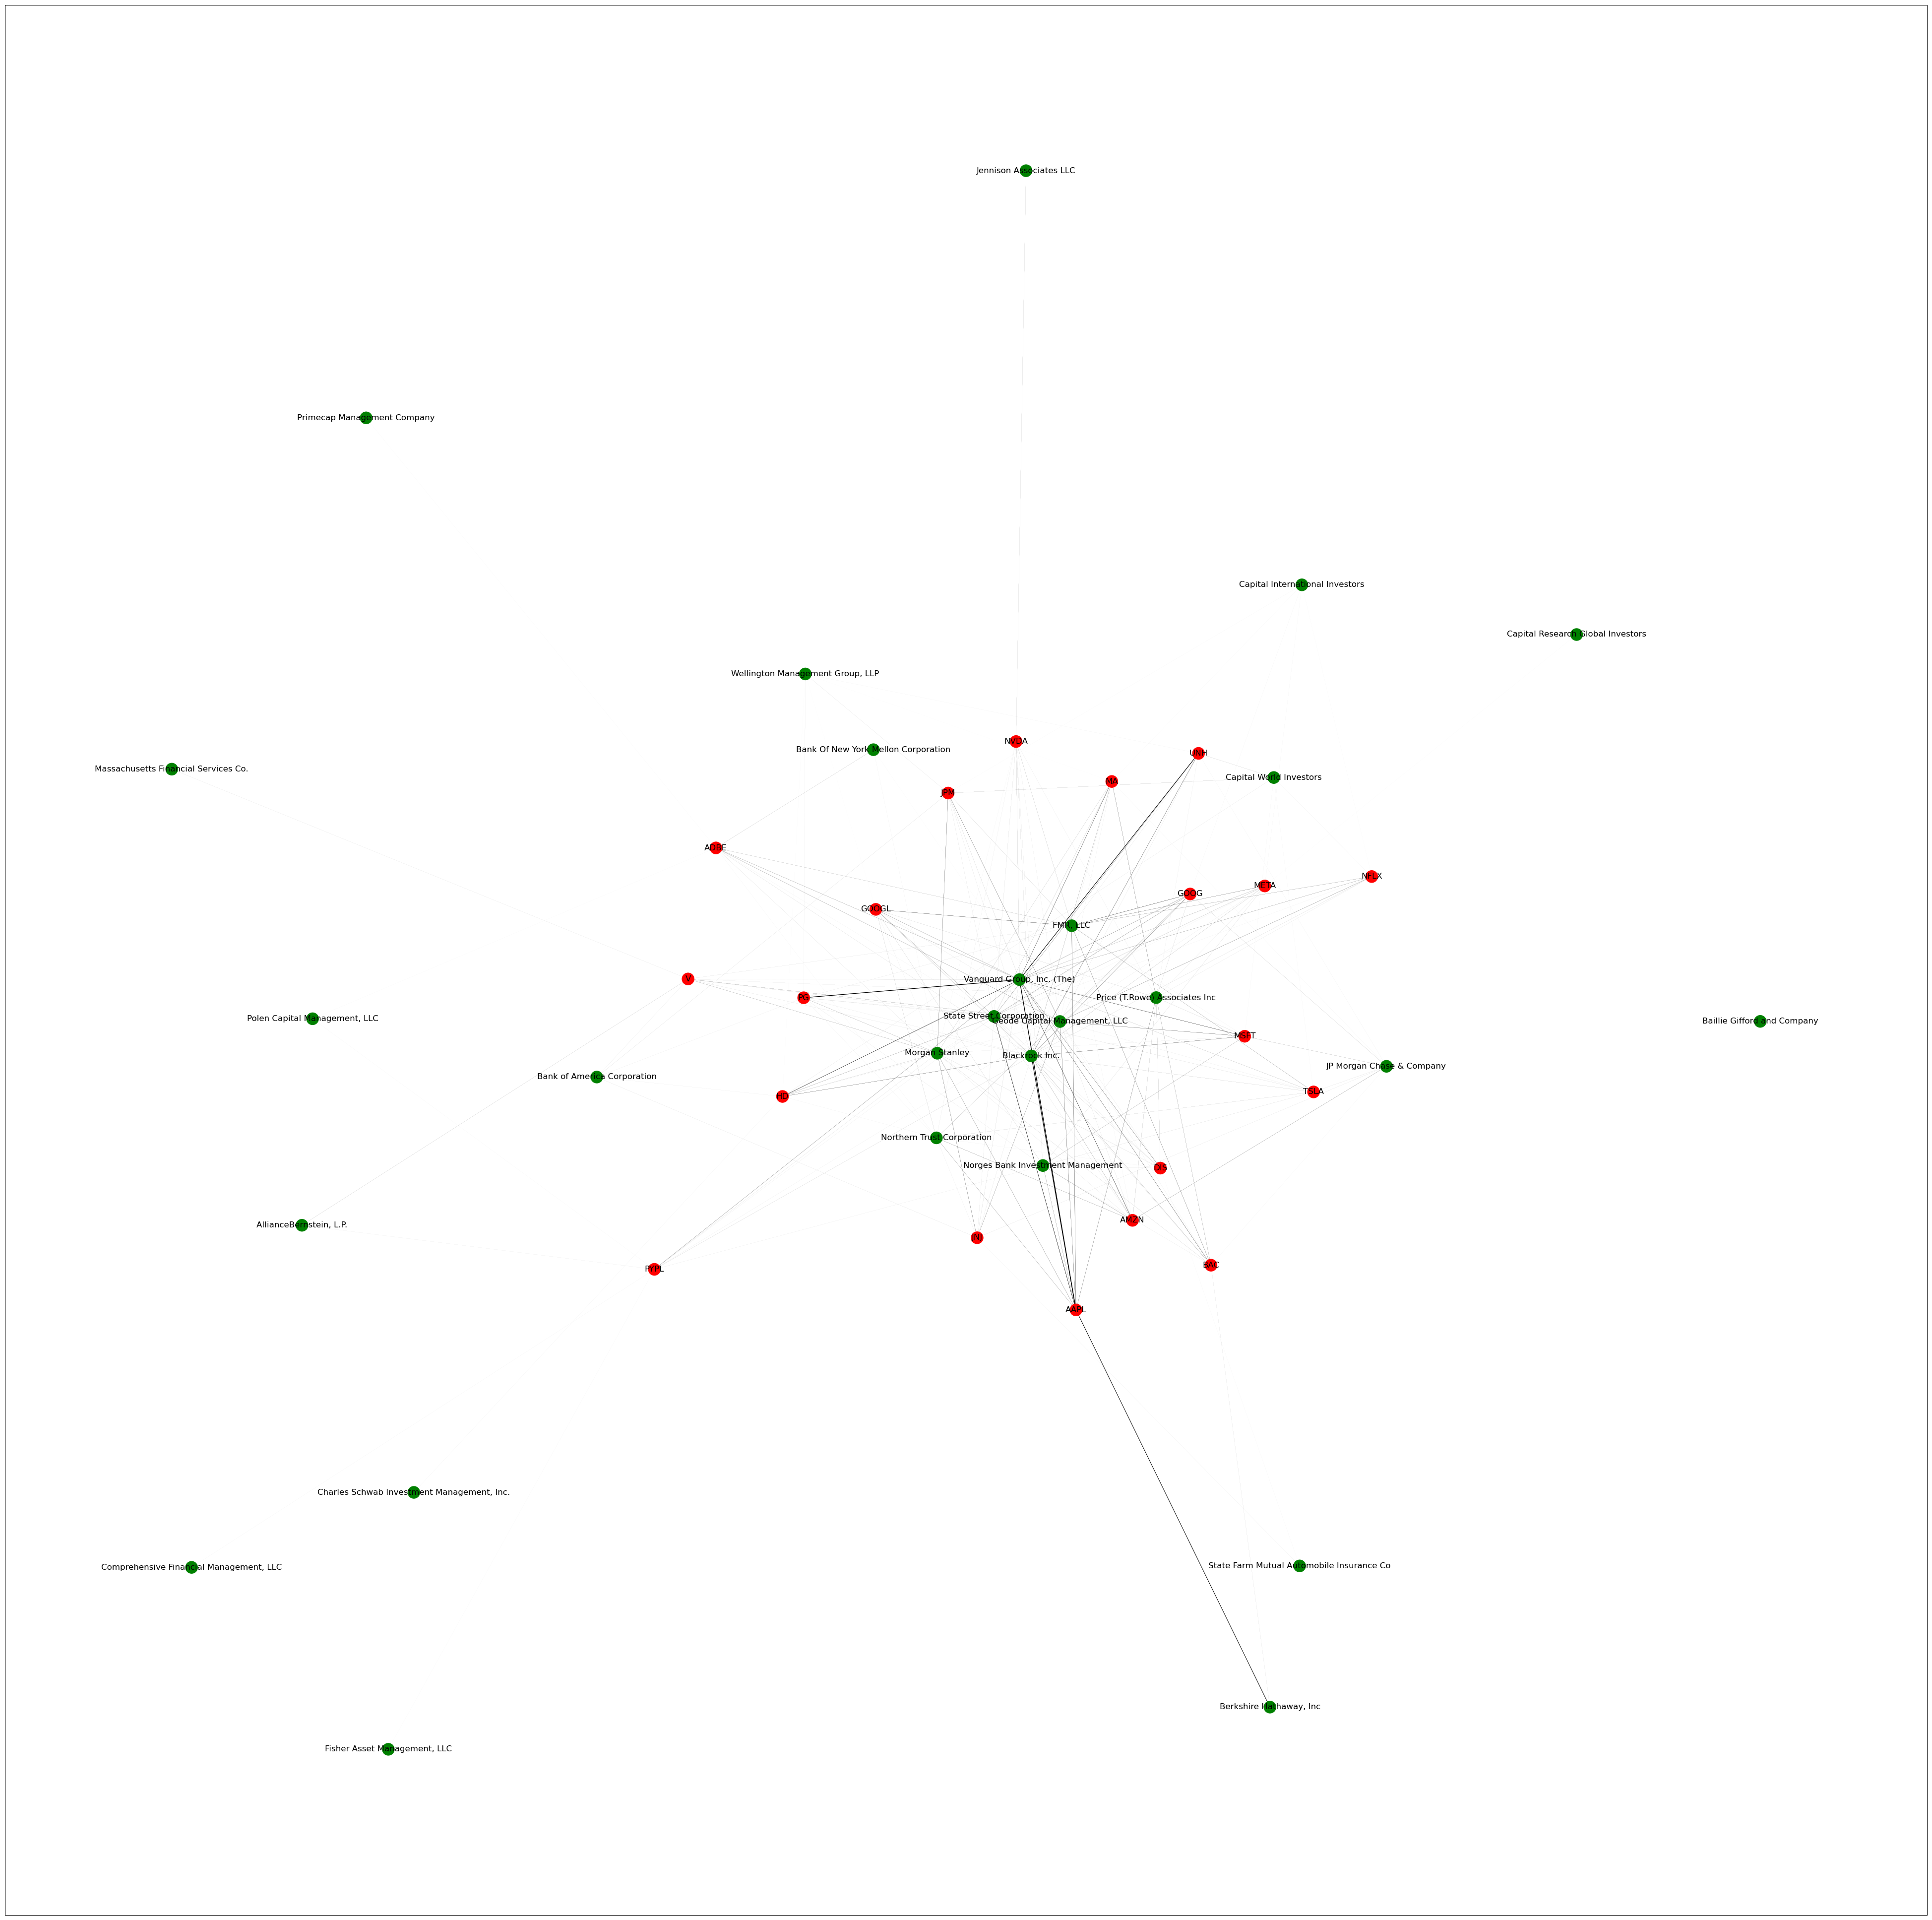

In [16]:
#Create a network graph with the holder as a source and the ticker symbol as a target. 
#Label the vertices with their respective labels.
#Add different colors for the source and the target, and change the size of the edge using the normalized holding amount. 
#And change the size of the ticker symbols by their degrees (scale if required)

G = nx.from_pandas_edgelist(stock_df, 'SYMBOL', 'HOLDER')
node_colors = ['red' if node in set(stock_df['SYMBOL']) else 'green' for node in G.nodes()]

norm = (stock_df['CASH'] - stock_df['CASH'].min()) / (stock_df['CASH'].max() - stock_df['CASH'].min())

degrees = dict(G.degree)
#font_sizes = {node: (degree + 10) * 100 for node, degree in degrees.items()}
    
fig, ax = plt.subplots(figsize=(50,50))
nx.draw_networkx(G,width = norm, node_color=node_colors)


pos = nx.spring_layout(G)
#x.draw_networkx_labels(G, pos,font_family='Arial')


plt.show()

### Problem 3.  
Do the following.
* Use web scrapping techniques to find 25 news articles related to each of the 20 stocks listed in the previous problem and create a data frame with the details: Date, Journalist, Article
* Perform a sentiment analysis using textblob in the data frame in part a and order the dataframe by sentiments.
* Repeat part b using the Naive Bayes sentiment analysis.
* Based on parts b and c, which 10 stocks will you choose for your portfolio?

In [17]:
#

In [18]:
import json
import requests
from bs4 import BeautifulSoup
from scrapy.selector import Selector 
from scrapy.http import HtmlResponse
from scrapy.crawler import CrawlerProcess

In [19]:
import newspaper
from newspaper import Article 
from tqdm import tqdm 

top20_tickers = ["AAPL", "AMZN", "MSFT", "GOOG", "GOOGL", "META", "TSLA", "NVDA", "JPM", "JNJ", "V", "PG",
                 "UNH", "HD", "MA", "BAC", "DIS", "PYPL", "NFLX", "ADBE"]
                 
def storydf(domain): 
    paper = newspaper.build(domain, memoize_articles=False) 
    urls = paper.article_urls()  
    titles = [] 
    texts = [] 
    languages = [] 
    keywords = []
    for url in tqdm(urls): 
        article = Article(url) 
        article.download() 
        article.parse() 
        article.nlp()         
        titles.append(article.title) 
        texts.append(article.text) 
        languages.append(article.meta_lang) 
        keywords.append(article.keywords) 
    df = pd.DataFrame({'urls':urls, 'title':titles, 'text':texts, 'lang':languages, 'keywords':keywords}) 
    return df 

domain = 'https://finance.yahoo.com'
df = storydf(domain) 
df.head()

100%|████████████████████████████████████████████████████████████████████████████████| 220/220 [04:11<00:00,  1.14s/it]


,urls,title,text,lang,keywords
0,https://finance.yahoo.com/news/microsoft-holdi...,Microsoft 'holding a lot of the cards' in AI-p...,Microsoft (MSFT) stock surged on Wednesday aft...,en,"[cards, search, holding, war, ai, growth, comp..."
1,https://finance.yahoo.com/news/meta-platforms-...,Meta Platforms stock soars after earnings crus...,Meta Platforms (META) reported first quarter r...,en,"[drop, actual, meta, billion, 2023, platforms,..."
2,https://finance.yahoo.com/news/house-republica...,House Republicans pass their debt ceiling prop...,Speaker Kevin McCarthy and House Republicans p...,en,"[president, republicans, house, heres, work, p..."
3,https://finance.yahoo.com/news/stock-market-ne...,Stocks mixed after strong results from Microso...,U.S. stocks closed mixed on Wednesday followin...,en,"[microsoft, republic, billion, earnings, showe..."
4,https://finance.yahoo.com/video/investors-too-...,Investors are too bearish on tech: Analyst,Meta Platforms (META) reported first quarter r...,en,"[think, big, meta, seeing, going, tech, invest..."


In [20]:

mask = df['text'].apply(lambda x: any(item in x for item in top20_tickers))
filtered_df = df[mask]
filtered_df

,urls,title,text,lang,keywords
0,https://finance.yahoo.com/news/microsoft-holdi...,Microsoft 'holding a lot of the cards' in AI-p...,Microsoft (MSFT) stock surged on Wednesday aft...,en,"[cards, search, holding, war, ai, growth, comp..."
1,https://finance.yahoo.com/news/meta-platforms-...,Meta Platforms stock soars after earnings crus...,Meta Platforms (META) reported first quarter r...,en,"[drop, actual, meta, billion, 2023, platforms,..."
2,https://finance.yahoo.com/news/house-republica...,House Republicans pass their debt ceiling prop...,Speaker Kevin McCarthy and House Republicans p...,en,"[president, republicans, house, heres, work, p..."
3,https://finance.yahoo.com/news/stock-market-ne...,Stocks mixed after strong results from Microso...,U.S. stocks closed mixed on Wednesday followin...,en,"[microsoft, republic, billion, earnings, showe..."
4,https://finance.yahoo.com/video/investors-too-...,Investors are too bearish on tech: Analyst,Meta Platforms (META) reported first quarter r...,en,"[think, big, meta, seeing, going, tech, invest..."
...,...,...,...,...,...
208,https://sports.yahoo.com/aaron-rodgers-traded-...,Aaron Rodgers traded to New York Jets: Fantasy...,"At long last, Aaron Rodgers is officially, fin...",en,"[breakdown, rodgers, offense, hall, receiver, ..."
209,https://sports.yahoo.com/aaron-rodgers-trade-n...,"Aaron Rodgers trade: Not surprisingly, Jets ge...",If you watched the New York Jets at all last s...,en,"[getting, rodgers, season, bowl, super, jets, ..."
210,https://sports.yahoo.com/key-questions-for-eve...,Key questions for every top-10 pick in an NFL ...,In the same 24-hour span that Atlanta Falcons ...,en,"[nfl, top10, pick, young, destined, draft, don..."
212,https://sports.yahoo.com/levis-odds-picked-no-...,Will Levis' odds to be picked No. 1 overall sk...,Kentucky quarterback Will Levis is a popular m...,en,"[rumors, nfl, pick, titans, overall, picked, l..."


In [21]:
from textblob import TextBlob
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment
    return sentiment.polarity, sentiment.subjectivity


df['sentiment_polarity'], df['sentiment_subjectivity'] = zip(*df['text'].apply(get_sentiment))

df

,urls,title,text,lang,keywords,sentiment_polarity,sentiment_subjectivity
0,https://finance.yahoo.com/news/microsoft-holdi...,Microsoft 'holding a lot of the cards' in AI-p...,Microsoft (MSFT) stock surged on Wednesday aft...,en,"[cards, search, holding, war, ai, growth, comp...",0.144621,0.445710
1,https://finance.yahoo.com/news/meta-platforms-...,Meta Platforms stock soars after earnings crus...,Meta Platforms (META) reported first quarter r...,en,"[drop, actual, meta, billion, 2023, platforms,...",0.141826,0.416029
2,https://finance.yahoo.com/news/house-republica...,House Republicans pass their debt ceiling prop...,Speaker Kevin McCarthy and House Republicans p...,en,"[president, republicans, house, heres, work, p...",0.104864,0.389561
3,https://finance.yahoo.com/news/stock-market-ne...,Stocks mixed after strong results from Microso...,U.S. stocks closed mixed on Wednesday followin...,en,"[microsoft, republic, billion, earnings, showe...",0.097022,0.394773
4,https://finance.yahoo.com/video/investors-too-...,Investors are too bearish on tech: Analyst,Meta Platforms (META) reported first quarter r...,en,"[think, big, meta, seeing, going, tech, invest...",0.127579,0.442026
...,...,...,...,...,...,...,...
215,https://sports.yahoo.com/ime-udoka-declines-to...,Ime Udoka declines to detail Celtics exit duri...,The Houston Rockets officially introduced Ime ...,en,"[ime, udoka, team, conference, coach, celtics,...",0.139976,0.445220
216,https://sports.yahoo.com/nba-finals-games-to-t...,NBA Finals games to tip off before 9 p.m. ET o...,East Coast basketball fans rejoice. You will n...,en,"[20, weeknights, ratings, times, tip, et, etga...",0.093817,0.441129
217,https://finance.yahoo.com/u/yahoo-finance/watc...,Stocks Most Bought by Activist Hedge Funds,Curated by Yahoo Finance\n\nFollow this list t...,en,"[watchlist, sophisticated, activist, winning, ...",0.171875,0.367708
218,https://finance.yahoo.com/u/yahoo-finance/watc...,Stocks Most Sold by Activist Hedge Funds,Curated by Yahoo Finance\n\nFollow this list t...,en,"[watchlist, sophisticated, activist, winning, ...",0.171875,0.367708


In [22]:
df3  = df.sort_values(by = ['sentiment_polarity'], ascending=False)

df3.head(10)

,urls,title,text,lang,keywords,sentiment_polarity,sentiment_subjectivity
180,https://sports.yahoo.com/college-womens-basket...,"NCAAW College Women's Basketball News, Expert ...",Yahoo Sports\n\nUConn's five national titles i...,en,"[recognize, basketball, national, matter, span...",0.500000,0.288889
179,https://sports.yahoo.com/ncaa-tournament-print...,NCAA tournament: Printable men's bracket for M...,"The NCAA men's tournament field is set, and it...",en,"[tumultuous, bracket, mens, tourney, ncaa, win...",0.425000,0.425000
55,https://autos.yahoo.com/kbbs-best-family-vehic...,KBB's best family vehicles for 2023 includes S...,\n\n\n\n\n\nJapanese and Korean-branded models...,en,"[vehicles, blue, 2023, best, family, honda, ke...",0.391333,0.471333
181,https://sports.yahoo.com/ncaa-tournament-print...,NCAA tournament: Printable women's bracket for...,"The NCAA tournament field is set, and it's tim...",en,"[seattle, bracket, seeds, carolina, south, tip...",0.362222,0.580556
185,https://sports.yahoo.com/sportsbook/news/,"sportsbook sportsbook News, Expert Analysis, R...",Yahoo Sports\n\nArlington vs. Houston is an in...,en,"[xfls, rumors, matchup, vs, stoops, phillips, ...",0.350000,0.383333
192,https://sports.yahoo.com/boxing-pound-for-poun...,Boxing pound-for-pound rankings: Gervonta 'Tan...,Gervonta Davis proved he's one of the best box...,en,"[gervonta, think, stevenson, spot, lightweight...",0.327333,0.545667
99,https://news.yahoo.com/kim-kardashian-offician...,Kim Kardashian was the officiant for Lukas Gag...,Lukas Gage and Chris Appleton confirmed on Wed...,en,"[really, kardashian, youre, officiant, confirm...",0.309573,0.568105
191,https://sports.yahoo.com/boxing/news/,"Boxing News, Expert Analysis, Rumors, Live Upd...","Yahoo Sports\n\nAfter his veteran, smooth perf...",en,"[garcia, rumors, worthy, slot, boxing, live, s...",0.308333,0.500000
49,https://www.yahoo.com/lifestyle/canadian-teach...,Canadian teacher's viral outfits are taking ov...,Zahra Hassan is a middle school teacher whose ...,en,"[videos, outfits, fashion, having, doing, cana...",0.269801,0.466276
28,https://autos.yahoo.com/wayfair-sale-great-dea...,"Wayfair Sale - great deals on home, garden, pa...",\n\n\n\n\n\nAutoblog may receive a share from ...,en,"[easy, patio, day, essentials, way, garage, wa...",0.263268,0.574458


### Problem 4: 
Upload the ratings.csv data set with movieId, userId, and the rating as columns and do the following. 
* Remove all the movies which have been rated < 100 times. Then use the filtered data to create a utility matrix.
* Change the utility matrix to a data frame and determine how many ratings will be missing. Calculate the percentage of the entries that are missing from the sparse matrix.
* Make an SVD-based Collaborative filtering recommender system to recommend movies to the user. What is the RMSE?
* Find the userId who has rated a movie for a movieId in the data and use the model to make the top 5 recommendations.

In [23]:
import surprise
from surprise import Dataset, Reader
from surprise import SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

In [24]:
rat_ids = pd.read_csv('ratings.csv')
print(rat_ids.head())

print('\n',"Null value count: ",rat_ids.isna().sum())

print('\n', rat_ids.shape)

   userId  movieId  rating
0       1        1     4.0
1       1        3     4.0
2       1        6     4.0
3       1       47     5.0
4       1       50     5.0

 Null value count:  userId     0
movieId    0
rating     0
dtype: int64

 (100836, 3)


In [25]:
import collections
frequency = collections.Counter(rat_ids['movieId'])
#print(dict(frequency))


print(rat_ids['movieId'].value_counts())
print(rat_ids.head())



356       329
318       317
296       307
593       279
2571      278
         ... 
86279       1
86922       1
5962        1
87660       1
163981      1
Name: movieId, Length: 9724, dtype: int64
   userId  movieId  rating
0       1        1     4.0
1       1        3     4.0
2       1        6     4.0
3       1       47     5.0
4       1       50     5.0


In [26]:
value_counts = rat_ids['movieId'].value_counts()
filtered_rat = rat_ids[rat_ids['movieId'].isin(value_counts.index[value_counts.gt(99)])]

print('\n',filtered_rat.shape)
print('\n',filtered_rat.head())
print('\n',filtered_rat['movieId'].value_counts())


 (20188, 3)

    userId  movieId  rating
0       1        1     4.0
2       1        6     4.0
3       1       47     5.0
4       1       50     5.0
7       1      110     4.0

 356      329
318      317
296      307
593      279
2571     278
        ... 
454      101
4022     100
912      100
1517     100
44191    100
Name: movieId, Length: 138, dtype: int64


In [27]:
example = filtered_rat.sample(n=20)
utility_matrix = filtered_rat.pivot_table( index = 'userId', columns= 'movieId', values = 'rating')
utility_matrix

movieId,1,2,6,10,32,34,39,47,50,110,...,7361,7438,8961,33794,44191,48516,58559,60069,68954,79132
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,NaN,NaN,5.0,5.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.0,4.5,NaN,NaN,4.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,4.0,3.0,NaN,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,NaN,NaN,NaN,4.0,NaN,NaN,3.0,4.5,3.5,...,4.0,4.5,4.0,NaN,NaN,3.5,NaN,4.0,NaN,NaN
607,4.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,2.5,2.0,NaN,4.0,3.5,3.5,3.0,4.5,4.5,4.0,...,4.5,4.0,4.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN


In [28]:
#Change the utility matrix to a data frame and determine how many ratings will be missing. 
#Calculate the percentage of the entries that are missing from the sparse matrix.



missing_values = 0
frequent_users = list(utility_matrix.to_records())
x = pd.DataFrame.from_records(frequent_users)

x.head()

print(x.isna().sum().sum())
print(x.size)

null_per = (x.isna().sum().sum()/x.size) * 100
print(null_per, 'percent')


62198
82983
74.95270115565839 percent


In [29]:
#Make an SVD-based Collaborative filtering recommender system to recommend movies to the user. What is the RMSE?
reader = Reader(rating_scale=(0, 5))
data = Dataset.load_from_df(filtered_rat[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=0.2)
rs_svd = SVD(n_epochs=20, lr_all=0.005, reg_all=0.2)
rs_svd.fit(trainset)

In [30]:
predictions = rs_svd.test(testset)
accuracy.rmse(predictions)

RMSE: 0.8330


0.8330148443901143

In [31]:
from surprise.model_selection import cross_validate
cross_validate(rs_svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8278  0.8251  0.8126  0.8103  0.8126  0.8177  0.0073  
MAE (testset)     0.6273  0.6311  0.6180  0.6270  0.6238  0.6254  0.0044  
Fit time          0.06    0.06    0.06    0.06    0.06    0.06    0.00    
Test time         0.01    0.01    0.01    0.01    0.01    0.01    0.00    


{'test_rmse': array([0.82780342, 0.82507494, 0.81260113, 0.81034071, 0.81258027]),
 'test_mae': array([0.62728967, 0.63109991, 0.61797013, 0.62702662, 0.6237927 ]),
 'fit_time': (0.05936241149902344,
  0.06023597717285156,
  0.06112527847290039,
  0.05980038642883301,
  0.05980086326599121),
 'test_time': (0.009966611862182617,
  0.008969783782958984,
  0.008970022201538086,
  0.008969545364379883,
  0.008970022201538086)}

In [32]:
testset[:10]

[(483, 5952, 4.5),
 (328, 293, 3.5),
 (389, 32, 4.0),
 (586, 1200, 5.0),
 (226, 1206, 4.0),
 (263, 4886, 4.5),
 (334, 1136, 4.0),
 (41, 1222, 2.0),
 (580, 2918, 1.0),
 (555, 2683, 5.0)]

In [33]:
testdf = pd.DataFrame(testset, columns=['userId', 'movieId', 'rating'])
test_umatrix = testdf.pivot(index='userId', columns='movieId', values='rating')
pd.DataFrame(test_umatrix).head()

movieId,1,2,6,10,32,34,39,47,50,110,...,7361,7438,8961,33794,44191,48516,58559,60069,68954,79132
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
predictions[0]

Prediction(uid=483, iid=5952, r_ui=4.5, est=4.116032197441884, details={'was_impossible': False})

In [35]:
filtered_rat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20188 entries, 0 to 100452
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   userId   20188 non-null  int64  
 1   movieId  20188 non-null  int64  
 2   rating   20188 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 630.9 KB


In [36]:
userId = 1
movieId = 47
prediction = rs_svd.predict(userId, movieId)
print(prediction.est)

4.306057767011716


In [37]:
#Find the userId who has rated a movie for a movieId in the data and use the model to make the top 5 recommendations.

movies = filtered_rat.loc[filtered_rat["userId"] == 10, "movieId"]
#print(movies)
top_film = []

for i in movies:
    prediction = rs_svd.predict(10, i)
    #print(prediction)
    top_film.append(prediction)


top = pd.DataFrame(top_film)
print(top.sort_values(by = ['est'], ascending=False))




    uid    iid  r_ui       est                    details
8    10   2959  None  3.443371  {'was_impossible': False}
18   10  58559  None  3.441051  {'was_impossible': False}
4    10    912  None  3.438974  {'was_impossible': False}
1    10    356  None  3.382605  {'was_impossible': False}
12   10   4995  None  3.381487  {'was_impossible': False}
7    10   2858  None  3.347185  {'was_impossible': False}
5    10   2571  None  3.343529  {'was_impossible': False}
15   10   7153  None  3.341300  {'was_impossible': False}
11   10   4993  None  3.319729  {'was_impossible': False}
0    10    296  None  3.308021  {'was_impossible': False}
13   10   5952  None  3.297091  {'was_impossible': False}
14   10   6377  None  3.277029  {'was_impossible': False}
19   10  68954  None  3.268276  {'was_impossible': False}
10   10   4306  None  3.220639  {'was_impossible': False}
9    10   3578  None  3.207060  {'was_impossible': False}
2    10    588  None  3.154618  {'was_impossible': False}
17   10  33794

By putting the predictions into a dataframe and sorting my 'est' we can see the 
predicted most popular films for user 10. The top 5 movie ids are:

912, 58559, 2959, 2571, and 356